In [1]:
import json
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import shapely

import shapefile

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from pyproj import Proj, transform

In [8]:
### parameters
season_start = 11
season_end = 3

epsg_latlon = 'epsg:4326'
epsg_local = 'epsg:3412'

inProj = Proj(init=epsg_local)
outProj = Proj(init=epsg_latlon)

In [3]:
sf = shapefile.Reader('../external/noaa-ice/poly/extent_S_197811_polygon_v2.1.zip')

In [4]:
shapes = sf.shapes()

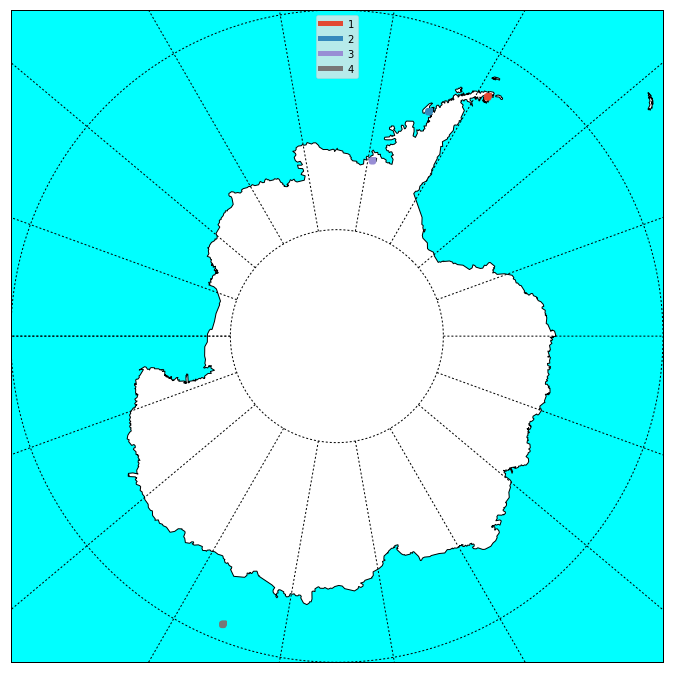

In [28]:
fig = plt.figure(figsize = (12,12))
m = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l')

m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
i = 0
for shape in shapes[:-1]:
    points = np.array(shape.points)
    lon,lat=transform(inProj,outProj,points[:,0],points[:,1])
    i = i+1
    m.plot(lon, lat, latlon = True, label = '{:d}'.format(i), lw=5)

plt.legend();

In [20]:
lon

array([  11.09372301,   12.17145821,   12.24912342, ...,  121.60750225,
        121.14858099,  121.42956561])

In [21]:
lat

array([-55.09618747, -54.96874801, -55.17469266, ..., -65.69767867,
       -65.8127409 , -66.00168651])

In [14]:
xy = np.array(shapes[0].points)

In [16]:
x1,y1=transform(inProj,outProj,xy[:,0],xy[:,1])

In [18]:
y1

array([-63.6913329 , -63.8764264 , -63.9939482 , -63.80791097, -63.6913329 ])

In [43]:
pts = []
for shape in shapes:
    for point in shape.points:
        pts.append(point)

In [45]:
pts = np.array(pts)


In [2]:
ext = pd.read_pickle('../external/noaa-ice/S_extent.p')
# seasonal values
ext.ix['1978-11':'1979-03'].min()

In [46]:
pts

array([[-2450000.,  1550000.],
       [-2425000.,  1550000.],
       [-2425000.,  1525000.],
       ..., 
       [ 2275000., -1400000.],
       [ 2275000., -1375000.],
       [ 2250000., -1375000.]])

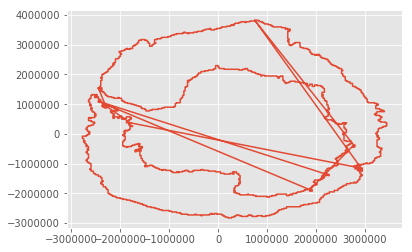

In [47]:
plt.plot(pts[:,0], pts[:,1])

In [25]:
len(shapes)

5

In [22]:
sf.shapeType

5

In [23]:
sf.bbox

[-2775000.0, -2825000.0, 3450000.0, 3825000.0]

In [27]:
for name in dir(shapes[3]):
    if not name.startswith('__'):
        name

In [28]:
name

'shapeType'

In [33]:
shapes[4].points

[(750000.0, 3825000.0),
 (825000.0, 3825000.0),
 (825000.0, 3800000.0),
 (850000.0, 3800000.0),
 (850000.0, 3775000.0),
 (900000.0, 3775000.0),
 (900000.0, 3750000.0),
 (925000.0, 3750000.0),
 (925000.0, 3725000.0),
 (950000.0, 3725000.0),
 (950000.0, 3700000.0),
 (1025000.0, 3700000.0),
 (1025000.0, 3675000.0),
 (1075000.0, 3675000.0),
 (1075000.0, 3650000.0),
 (1100000.0, 3650000.0),
 (1100000.0, 3625000.0),
 (1125000.0, 3625000.0),
 (1125000.0, 3600000.0),
 (1300000.0, 3600000.0),
 (1300000.0, 3575000.0),
 (1375000.0, 3575000.0),
 (1375000.0, 3525000.0),
 (1400000.0, 3525000.0),
 (1400000.0, 3550000.0),
 (1425000.0, 3550000.0),
 (1425000.0, 3500000.0),
 (1450000.0, 3500000.0),
 (1450000.0, 3525000.0),
 (1475000.0, 3525000.0),
 (1475000.0, 3475000.0),
 (1450000.0, 3475000.0),
 (1450000.0, 3450000.0),
 (1425000.0, 3450000.0),
 (1425000.0, 3200000.0),
 (1450000.0, 3200000.0),
 (1450000.0, 3150000.0),
 (1425000.0, 3150000.0),
 (1425000.0, 3100000.0),
 (1450000.0, 3100000.0),
 (1450000.0

In [34]:
sf.fields

[('DeletionFlag', 'C', 1, 0), ['FID', 'N', 11, 0]]

In [35]:
s = sf.shape(0)

In [36]:
s.__geo_interface__


{'coordinates': (((-2450000.0, 1550000.0),
   (-2425000.0, 1550000.0),
   (-2425000.0, 1525000.0),
   (-2450000.0, 1525000.0),
   (-2450000.0, 1550000.0)),),
 'type': 'Polygon'}

In [37]:
sf.elevation

[0.0, 0.0]

In [38]:
sf.

<_io.BufferedReader name='../external/noaa-ice/poly/extent_S_197811_polygon_v2.1.dbf'>

In [40]:
import gdal

ImportError: No module named 'gdal'

In [41]:
from pyproj import Proj, transform

In [42]:
import pyproj

In [ ]:
pyproj.